In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train = pd.read_csv('/home/praveen/projects/employee/train.csv')
test = pd.read_csv('/home/praveen/projects/employee/test.csv')
sample = pd.read_csv('/home/praveen/projects/employee/sample_submission.csv')

In [4]:
train.head()

,Id,Year Type,Year,Organization Group,Department,Union,Job Family,Job,Employee Identifier,Retirement,Health and Dental,Other Benefits,Total Compensation
0,0,Calendar,2018,Community Health,NaN,"Prof & Tech Eng, Local 21",Information Systems,IS Business Analyst-Principal,8594384,$0.0,$13527.66,$0.0,0.00
1,1,Calendar,2014,"Public Works, Transportation & Commerce",MTA Municipal Transprtn Agncy,"SEIU - Miscellaneous, Local 1021",Public Service Aide,Publ Svc Aide-Asst To Prof,22142,$0.0,$3995.56,$875.27,16176.35
2,2,Fiscal,2018,General City Responsibilities,NaN,"SEIU, Local 1021, Misc","Payroll, Billing & Accounting",Senior Account Clerk,8512172,$0.0,$0.0,$0.0,248.30
3,3,Fiscal,2015,Community Health,DPH Public Health,"SEIU - Miscellaneous, Local 1021",Purchasing & Storekeeping,Sr Materials & Supplies Sprv,47593,$11671.59,$10680.55,$4400.24,80020.86
4,4,Fiscal,2014,Community Health,DPH Public Health,"SEIU - Miscellaneous, Local 1021",Hospital Administration,Medical Records Technician,47549,$14617.66,$12464.61,$5562.09,101207.38


In [5]:
test.head()

,Id,Year Type,Year,Organization Group,Department,Union,Job Family,Job,Employee Identifier,Retirement,Health and Dental,Other Benefits
0,0,Calendar,2017,"Public Works, Transportation & Commerce",NaN,"Electrical Workers, Local 6",Journeyman Trade,Electrical Line Worker,8549078,$0.0,$13051.16,$0.0
1,1,Calendar,2019,Public Protection,NaN,"SEIU, Local 1021, Misc",Correction & Detention,"Counselor, Juvenile Hall PERS",8546443,$21487.97,$28361.72,$753.13
2,2,Fiscal,2018,Community Health,NaN,"SEIU, Local 1021, Misc",Dietary & Food,Food Service Worker,8512207,$12468.31,$13863.98,$4464.84
3,3,Fiscal,2018,Public Protection,NaN,"SEIU, Local 1021, Misc",Correction & Detention,"Counselor, Juvenile Hall SFERS",8542154,$0.0,$0.0,$1787.63
4,4,Fiscal,2017,Public Protection,POL Police,"SEIU - Miscellaneous, Local 1021",Protection & Apprehension,Police Cadet,48828,$4489.2,$8003.53,$2015.35


In [6]:
train.shape , test.shape

((567103, 13), (177220, 12))

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 567103 entries, 0 to 567102
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Id                   567103 non-null  int64  
 1   Year Type            567103 non-null  object 
 2   Year                 567103 non-null  int64  
 3   Organization Group   567103 non-null  object 
 4   Department           272038 non-null  object 
 5   Union                566758 non-null  object 
 6   Job Family           567103 non-null  object 
 7   Job                  567100 non-null  object 
 8   Employee Identifier  567103 non-null  int64  
 9   Retirement           567103 non-null  object 
 10  Health and Dental    567103 non-null  object 
 11  Other Benefits       567103 non-null  object 
 12  Total Compensation   567103 non-null  float64
dtypes: float64(1), int64(3), object(9)
memory usage: 56.2+ MB


In [8]:
train.describe()

,Id,Year,Employee Identifier,Total Compensation
count,567103.000000,567103.000000,5.671030e+05,567103.000000
mean,283551.000000,2016.718106,4.502940e+06,82952.016002
std,163708.679191,1.983861,4.306688e+06,74338.078988
min,0.000000,2013.000000,1.000000e+00,-42615.240000
25%,141775.500000,2015.000000,2.959550e+04,6946.620000
50%,283551.000000,2017.000000,8.497001e+06,78706.040000
75%,425326.500000,2018.000000,8.556148e+06,133852.340000
max,567102.000000,2020.000000,1.223014e+07,807175.090000


In [9]:
train.isnull().sum()

Id                          0
Year Type                   0
Year                        0
Organization Group          0
Department             295065
Union                     345
Job Family                  0
Job                         3
Employee Identifier         0
Retirement                  0
Health and Dental           0
Other Benefits              0
Total Compensation          0
dtype: int64

In [10]:
train.drop(['Department','Union'],axis=1)

,Id,Year Type,Year,Organization Group,Job Family,Job,Employee Identifier,Retirement,Health and Dental,Other Benefits,Total Compensation
0,0,Calendar,2018,Community Health,Information Systems,IS Business Analyst-Principal,8594384,$0.0,$13527.66,$0.0,0.00
1,1,Calendar,2014,"Public Works, Transportation & Commerce",Public Service Aide,Publ Svc Aide-Asst To Prof,22142,$0.0,$3995.56,$875.27,16176.35
2,2,Fiscal,2018,General City Responsibilities,"Payroll, Billing & Accounting",Senior Account Clerk,8512172,$0.0,$0.0,$0.0,248.30
3,3,Fiscal,2015,Community Health,Purchasing & Storekeeping,Sr Materials & Supplies Sprv,47593,$11671.59,$10680.55,$4400.24,80020.86
4,4,Fiscal,2014,Community Health,Hospital Administration,Medical Records Technician,47549,$14617.66,$12464.61,$5562.09,101207.38
...,...,...,...,...,...,...,...,...,...,...,...
567098,567098,Fiscal,2018,Public Protection,Police Services,Police Officer,8594282,$9483.37,$8487.84,$2888.13,74977.10
567099,567099,Fiscal,2014,General Administration & Finance,"Budget, Admn & Stats Analysis",Senior Administrative Analyst,48480,$12963.3,$7774.8,$4702.47,86244.18
567100,567100,Calendar,2018,Public Protection,Fire Services,EMT/Paramedic/Firefighter,8547769,$0.0,$4617.42,$0.0,0.00
567101,567101,Calendar,2017,Human Welfare & Neighborhood Development,Nursing,Registered Nurse,8515186,$0.0,$13037.64,$0.0,0.00


<AxesSubplot:>

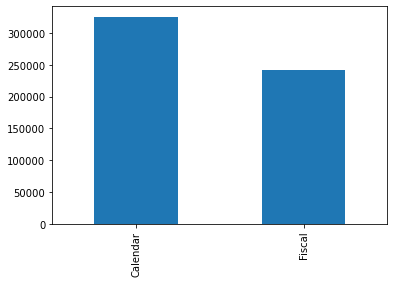

In [11]:
train['Year Type'].value_counts().plot(kind = 'bar')

In [12]:
train['Total Compensation'].value_counts(normalize=True)

0.00         0.140983
11.54        0.000451
26.50        0.000166
232.70       0.000150
481.00       0.000150
               ...   
8663.38      0.000002
126512.77    0.000002
125772.46    0.000002
125817.30    0.000002
129583.51    0.000002
Name: Total Compensation, Length: 339848, dtype: float64

<AxesSubplot:>

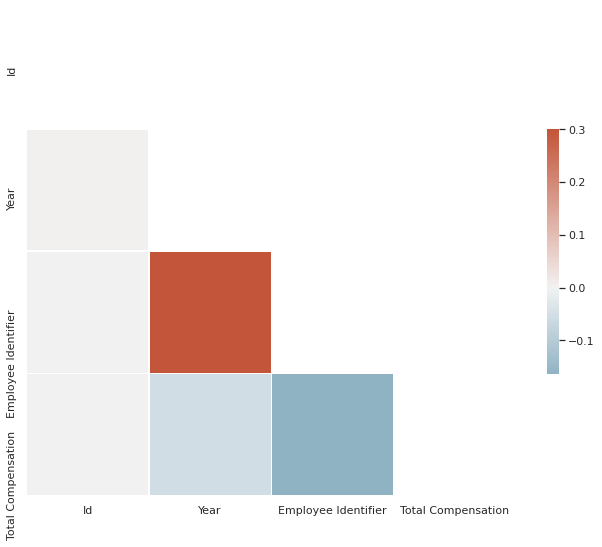

In [13]:
sns.set_theme(style="white")
f, ax = plt.subplots(figsize=(11, 9))

corr = train.corr()
cmap = sns.diverging_palette(230, 20, as_cmap=True)

mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

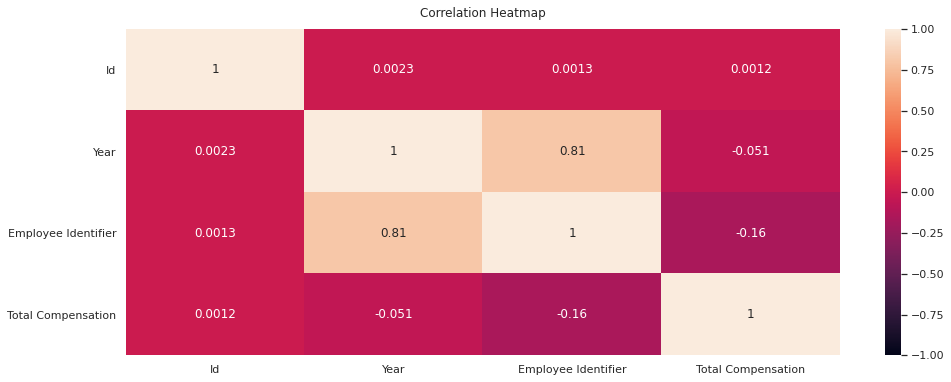

In [14]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(train.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [15]:
train.groupby(['Organization Group','Department'])['Year'].value_counts(normalize=True).nlargest(10)

Organization Group                        Department                      Year
Human Welfare & Neighborhood Development  CII Commty Invest & Infrstrctr  2013    1.000000
Public Works, Transportation & Commerce   HHP CleanPowerSF                2017    0.777778
Human Welfare & Neighborhood Development  HOM HOMELESSNESS SERVICES       2017    0.741667
General City Responsibilities             GEN General City / Unallocated  2013    0.448598
General Administration & Finance          HSS Health Service System       2013    0.367925
Public Works, Transportation & Commerce   BOA Board Of Appeals - PAB      2017    0.302326
Culture & Recreation                      LLB Law Library                 2013    0.300000
                                                                          2017    0.300000
General Administration & Finance          REG Elections                   2016    0.296023
Human Welfare & Neighborhood Development  HRC Human Rights Commission     2013    0.292135
Name: Year,

In [16]:
train['Total Compensation'].isnull()

0         False
1         False
2         False
3         False
4         False
          ...  
567098    False
567099    False
567100    False
567101    False
567102    False
Name: Total Compensation, Length: 567103, dtype: bool

<AxesSubplot:>

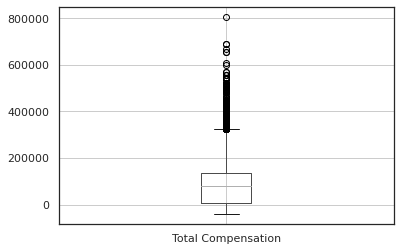

In [17]:
train.boxplot(column = 'Total Compensation')

In [18]:
Q1 = train.quantile(0.25)
Q3 = train.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Id                      283551.00
Year                         3.00
Employee Identifier    8526552.50
Total Compensation      126905.72
dtype: float64


In [19]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR = Q3-Q1
    lower_range = Q1-(1.5*IQR)
    upper_range = Q3+(1.5*IQR)
    return lower_range,upper_range

In [20]:
lowprice,uppprice = remove_outlier(train['Total Compensation'])
train['Total Compensation']=np.where(train['Total Compensation']>uppprice,uppprice,train['Total Compensation'])
train['Total Compensation']=np.where(train['Total Compensation']<lowprice,lowprice,train['Total Compensation'])

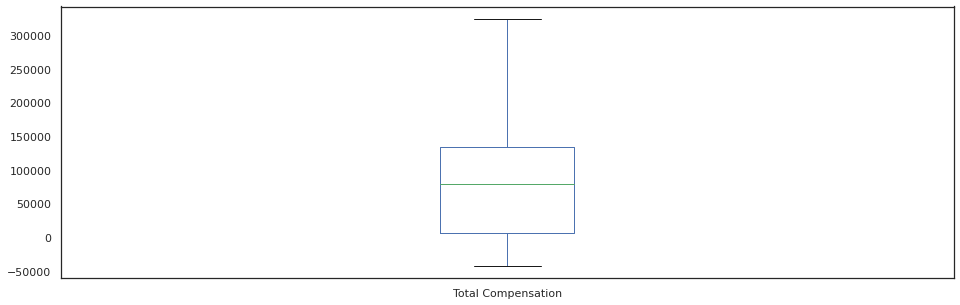

In [21]:
train['Total Compensation'].plot.box(figsize=(16,5))
plt.show()

In [22]:
train['Retirement'].value_counts()

$0.0         171690
$11459.84       195
$11530.75       187
$12575.0        171
$11415.25       162
              ...  
$11477.5          1
$13312.26         1
$12938.31         1
$6989.95          1
$21850.06         1
Name: Retirement, Length: 227345, dtype: int64

In [23]:
train.groupby(['Job Family','Job'])['Health and Dental'].value_counts(normalize=True)

Job Family                     Job                   Health and Dental
Administrative & Mgmt (Unrep)  Administrator, DPH    $28509.7             0.238095
                                                     $28359.52            0.190476
                                                     $0.0                 0.142857
                                                     $15075.6             0.095238
                                                     $29493.78            0.095238
                                                                            ...   
Untitled                       Superior Court Judge  $28509.7             0.036254
                                                     $13863.98            0.027190
                                                     $6747.52             0.024169
                                                     $15075.58            0.021148
                                                     $12356.63            0.003021
Name: Health and

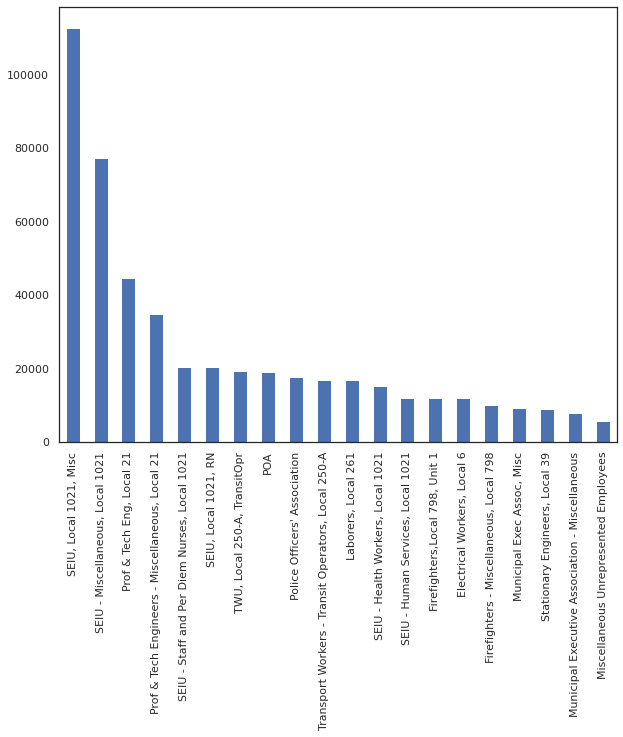

In [24]:
fig=plt.figure(figsize=(10,8))
train['Union'].value_counts().nlargest(20).plot(kind='bar')
plt.show()

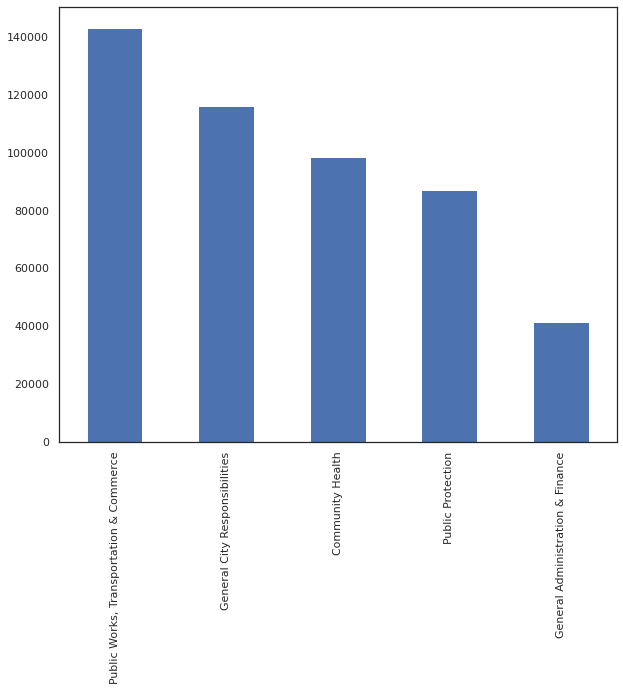

In [25]:
fig=plt.figure(figsize=(10,8))
train['Organization Group'].value_counts().nlargest().plot(kind='bar')
plt.show()

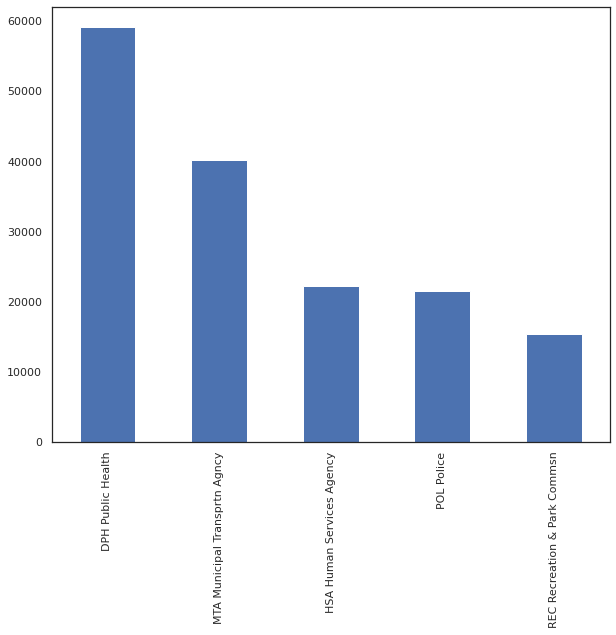

In [26]:
fig=plt.figure(figsize=(10,8))
train['Department'].value_counts().nlargest().plot(kind='bar')
plt.show()

In [27]:
train.corr()

,Id,Year,Employee Identifier,Total Compensation
Id,1.000000,0.002284,0.001306,0.001170
Year,0.002284,1.000000,0.807132,-0.051889
Employee Identifier,0.001306,0.807132,1.000000,-0.163964
Total Compensation,0.001170,-0.051889,-0.163964,1.000000


In [28]:
train.isnull().sum()

Id                          0
Year Type                   0
Year                        0
Organization Group          0
Department             295065
Union                     345
Job Family                  0
Job                         3
Employee Identifier         0
Retirement                  0
Health and Dental           0
Other Benefits              0
Total Compensation          0
dtype: int64

In [29]:
train.drop(['Year Type','Organization Group','Department','Union','Job Family','Job'],axis=1,inplace=True)

In [30]:
train.head()

,Id,Year,Employee Identifier,Retirement,Health and Dental,Other Benefits,Total Compensation
0,0,2018,8594384,$0.0,$13527.66,$0.0,0.00
1,1,2014,22142,$0.0,$3995.56,$875.27,16176.35
2,2,2018,8512172,$0.0,$0.0,$0.0,248.30
3,3,2015,47593,$11671.59,$10680.55,$4400.24,80020.86
4,4,2014,47549,$14617.66,$12464.61,$5562.09,101207.38


In [31]:
test.drop(['Year Type','Organization Group','Department','Union','Job Family','Job'],axis=1,inplace=True)

In [32]:
cols = ['Retirement','Health and Dental','Other Benefits']

# pass them to df.replace(), specifying each char and it's replacement:
train[cols] = train[cols].replace({'\$': '', ',': ''}, regex=True)

In [33]:
cols = ['Retirement','Health and Dental','Other Benefits']

# pass them to df.replace(), specifying each char and it's replacement:
test[cols] = test[cols].replace({'\$': '', ',': ''}, regex=True)

In [34]:
X = train.drop('Total Compensation',axis=1)
y = train['Total Compensation']

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y,train_size =0.75, random_state=0)


In [36]:
X_train.shape , X_val.shape

((425327, 6), (141776, 6))

In [37]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


In [38]:
lr = LinearRegression()
ls = Lasso()
rd = Ridge()
dr = DecisionTreeRegressor()
rr = RandomForestRegressor()

In [39]:
lr.fit(X_train,y_train)

LinearRegression()

In [40]:
y_pred = lr.predict(X_val)

In [41]:
np.sqrt(mean_squared_error(y_val, y_pred))

18278.404841669413

In [49]:
X = train.drop('Total Compensation',axis=1)
y = train['Total Compensation']
X_val = test

In [50]:
lr = LinearRegression()
ls = Lasso()
rd = Ridge()
dr = DecisionTreeRegressor()
rr = RandomForestRegressor()

In [51]:
lr.fit(X_train,y_train)

LinearRegression()

In [52]:
y_pred = lr.predict(X_val)

In [53]:
y_pred = pd.DataFrame(y_pred)

In [54]:
y_pred.shape

(177220, 1)

In [56]:
y_pred.rename(columns={0:'Id',1:'Total Compensation'},inplace =True)

In [57]:
y_pred

,Id
0,12067.596430
1,164604.831177
2,98997.106233
3,4607.649525
4,47136.541577
...,...
177215,114332.376656
177216,46300.119254
177217,54576.061313
177218,96601.882484


In [58]:
y_pred.to_csv('/home/praveen/projects/employee/submission1.csv', index=False)
